In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
print("Version: ", tf.__version__) # Check tf version
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE") # Check GPU status
physical_devices = tf.config.experimental.list_physical_devices('GPU') # Config GPU
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Version:  2.2.0
GPU is available


In [2]:
plt.style.use('ggplot')

### Reading data

In [3]:
# Reading in data
images = np.load('images.npy')
labels = np.load('labels.npy')

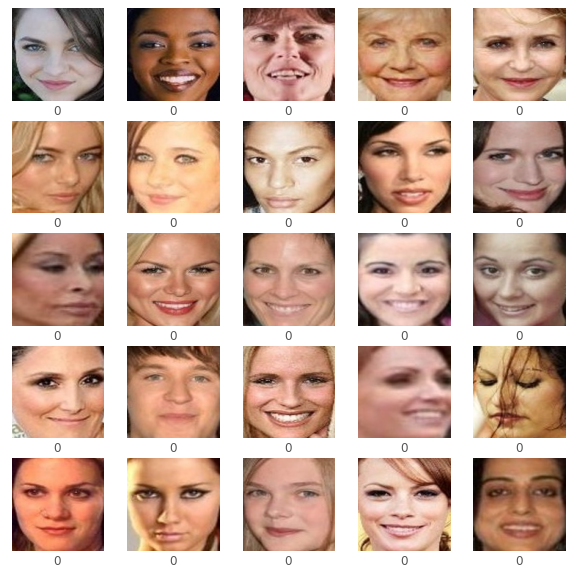

In [4]:
# Image Verification (Female)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

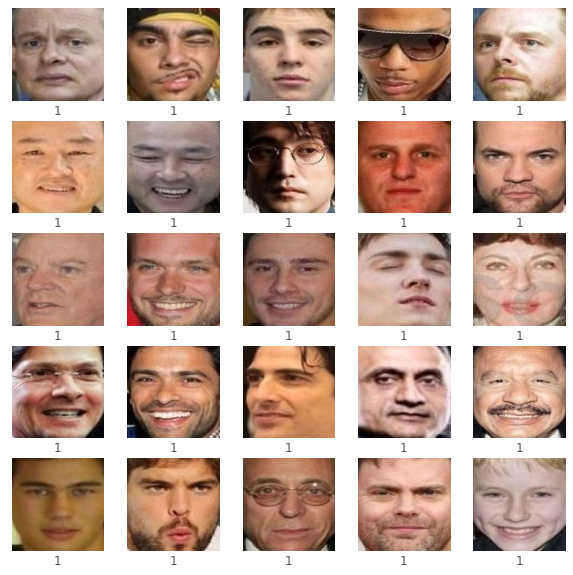

In [5]:
# Image Verification (Male)
plt.figure(figsize=(10,10))
n = 0
for i in range(-25, 0):
    plt.subplot(5,5,n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
    n+=1
plt.show()

In [6]:
print("Number of training images:", len(images))
print("Number of training labels:", len(labels))

Number of training images: 47009
Number of training labels: 47009


Text(0.5, 1.0, 'gender label counts')

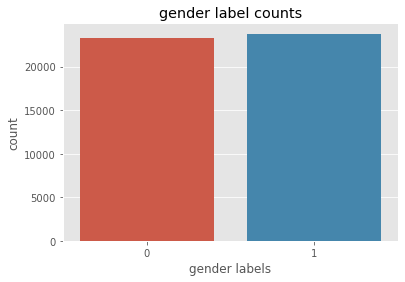

In [7]:
g = sns.countplot(labels)
g.set_xlabel('gender labels')
g.set_title('gender label counts')

Balance set is quite balanced.

In [8]:
print("Number of female labels:", list(labels).count(0))
print("Number of male labels:", list(labels).count(1))

Number of female labels: 23243
Number of male labels: 23766


### Model

In [9]:
# Building model
model = models.Sequential()

KERNEL = (3,3)
POOL = (2,2)
INPUT_SHAPE = (128, 128, 3)

# VGG1
model.add(layers.Conv2D(filters= 32, kernel_size= KERNEL, padding= 'same', activation= 'relu', input_shape= INPUT_SHAPE))
model.add(layers.MaxPooling2D(POOL))
model.add(layers.Dropout(0.2))

# VGG2
model.add(layers.Conv2D(filters= 64, kernel_size= KERNEL, padding= 'same', activation= 'relu'))
model.add(layers.MaxPooling2D(POOL))
model.add(layers.Dropout(0.2))

# MLP
model.add(layers.Flatten())
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dropout(0.5))

# OUTPUT LAYER
model.add(layers.Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [10]:
# Compile model
model.compile(optimizer= 'adam',
             loss= 'binary_crossentropy',
             metrics= ['accuracy'])

In [11]:
# train_test_split
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size= TEST_SIZE)

In [12]:
print("X_train dimensions:", X_train.shape)
print("X_test dimensions:", X_test.shape)
print("y_train dimensions:", y_train.shape)
print("y_test dimensions:", y_test.shape)

X_train dimensions: (37607, 128, 128, 3)
X_test dimensions: (9402, 128, 128, 3)
y_train dimensions: (37607,)
y_test dimensions: (9402,)


In [13]:
print("Total number of training data:", X_train.shape[0])
print("Total number of validation data:", X_test.shape[0])

Total number of training data: 37607
Total number of validation data: 9402


In [14]:
X_train, X_test = X_train.astype('float16'), X_test.astype('float16')

### Model training and validating

In [16]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 20, verbose= 1)

Epoch 1/20
1176/1176 [==============================] - 39s 33ms/step - loss: 0.3251 - accuracy: 0.8635 - val_loss: 0.1958 - val_accuracy: 0.9278
Epoch 2/20
1176/1176 [==============================] - 67s 57ms/step - loss: 0.1986 - accuracy: 0.9243 - val_loss: 0.2092 - val_accuracy: 0.9194
Epoch 3/20
1176/1176 [==============================] - 41s 35ms/step - loss: 0.1722 - accuracy: 0.9348 - val_loss: 0.1568 - val_accuracy: 0.9413
Epoch 4/20
1176/1176 [==============================] - 32s 27ms/step - loss: 0.1509 - accuracy: 0.9435 - val_loss: 0.1526 - val_accuracy: 0.9449
Epoch 5/20
1176/1176 [==============================] - 43s 37ms/step - loss: 0.1341 - accuracy: 0.9506 - val_loss: 0.1506 - val_accuracy: 0.9448
Epoch 6/20
1176/1176 [==============================] - 34s 29ms/step - loss: 0.1239 - accuracy: 0.9546 - val_loss: 0.1656 - val_accuracy: 0.9402
Epoch 7/20
1176/1176 [==============================] - 29s 25ms/step - loss: 0.1114 - accuracy: 0.9584 - val_loss: 0.1665 -

294/294 - 3s - loss: 0.2448 - accuracy: 0.9477


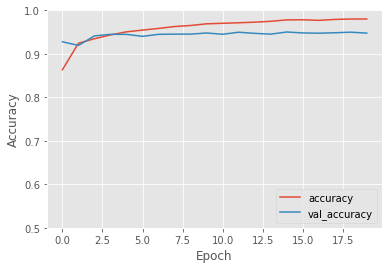

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2) 

In [22]:
model.save('model.h5')